# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/47/horse+colic.

In [12]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
# fetch dataset 
horse_colic = fetch_ucirepo(id=47) 
  
# data (as pandas dataframes) 
X = horse_colic.data.features 
y = horse_colic.data.targets 
  
# variable information 
print(horse_colic.variables) 

                              name     role        type demographic  \
0                          surgery  Feature     Integer        None   
1                              age  Feature     Integer         Age   
2                  hospital_number  Feature     Integer        None   
3               rectal_temperature  Feature  Continuous        None   
4                            pulse  Feature     Integer        None   
5                 respiratory_rate  Feature     Integer        None   
6       temperature_of_extremities  Feature     Integer        None   
7                 peripheral_pulse  Feature     Integer        None   
8                 mucous_membranes  Feature     Integer        None   
9            capillary_refill_time  Feature     Integer        None   
10                            pain  Feature     Integer        None   
11                     peristalsis  Feature     Integer        None   
12            abdominal_distension  Feature     Integer        None   
13    

In [4]:
if isinstance(horse_colic.data.targets, pd.DataFrame):
    y = horse_colic.data.targets.squeeze()
else:
    y = pd.Series(horse_colic.data.targets, name='target')

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [14]:
clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [8]:
print("Features Head:")
print(X.head())  
print("Targets Head:")
print(y.head()) 

Features Head:
   surgery  age  hospital_number  rectal_temperature  pulse  respiratory_rate  \
0      2.0    1           530101                38.5   66.0              28.0   
1      1.0    1           534817                39.2   88.0              20.0   
2      2.0    1           530334                38.3   40.0              24.0   
3      1.0    9          5290409                39.1  164.0              84.0   
4      2.0    1           530255                37.3  104.0              35.0   

   temperature_of_extremities  peripheral_pulse  mucous_membranes  \
0                         3.0               3.0               NaN   
1                         NaN               NaN               4.0   
2                         1.0               1.0               3.0   
3                         4.0               1.0               6.0   
4                         NaN               NaN               6.0   

   capillary_refill_time  ...  abdomen  packed_cell_volume  total_protein  \
0     

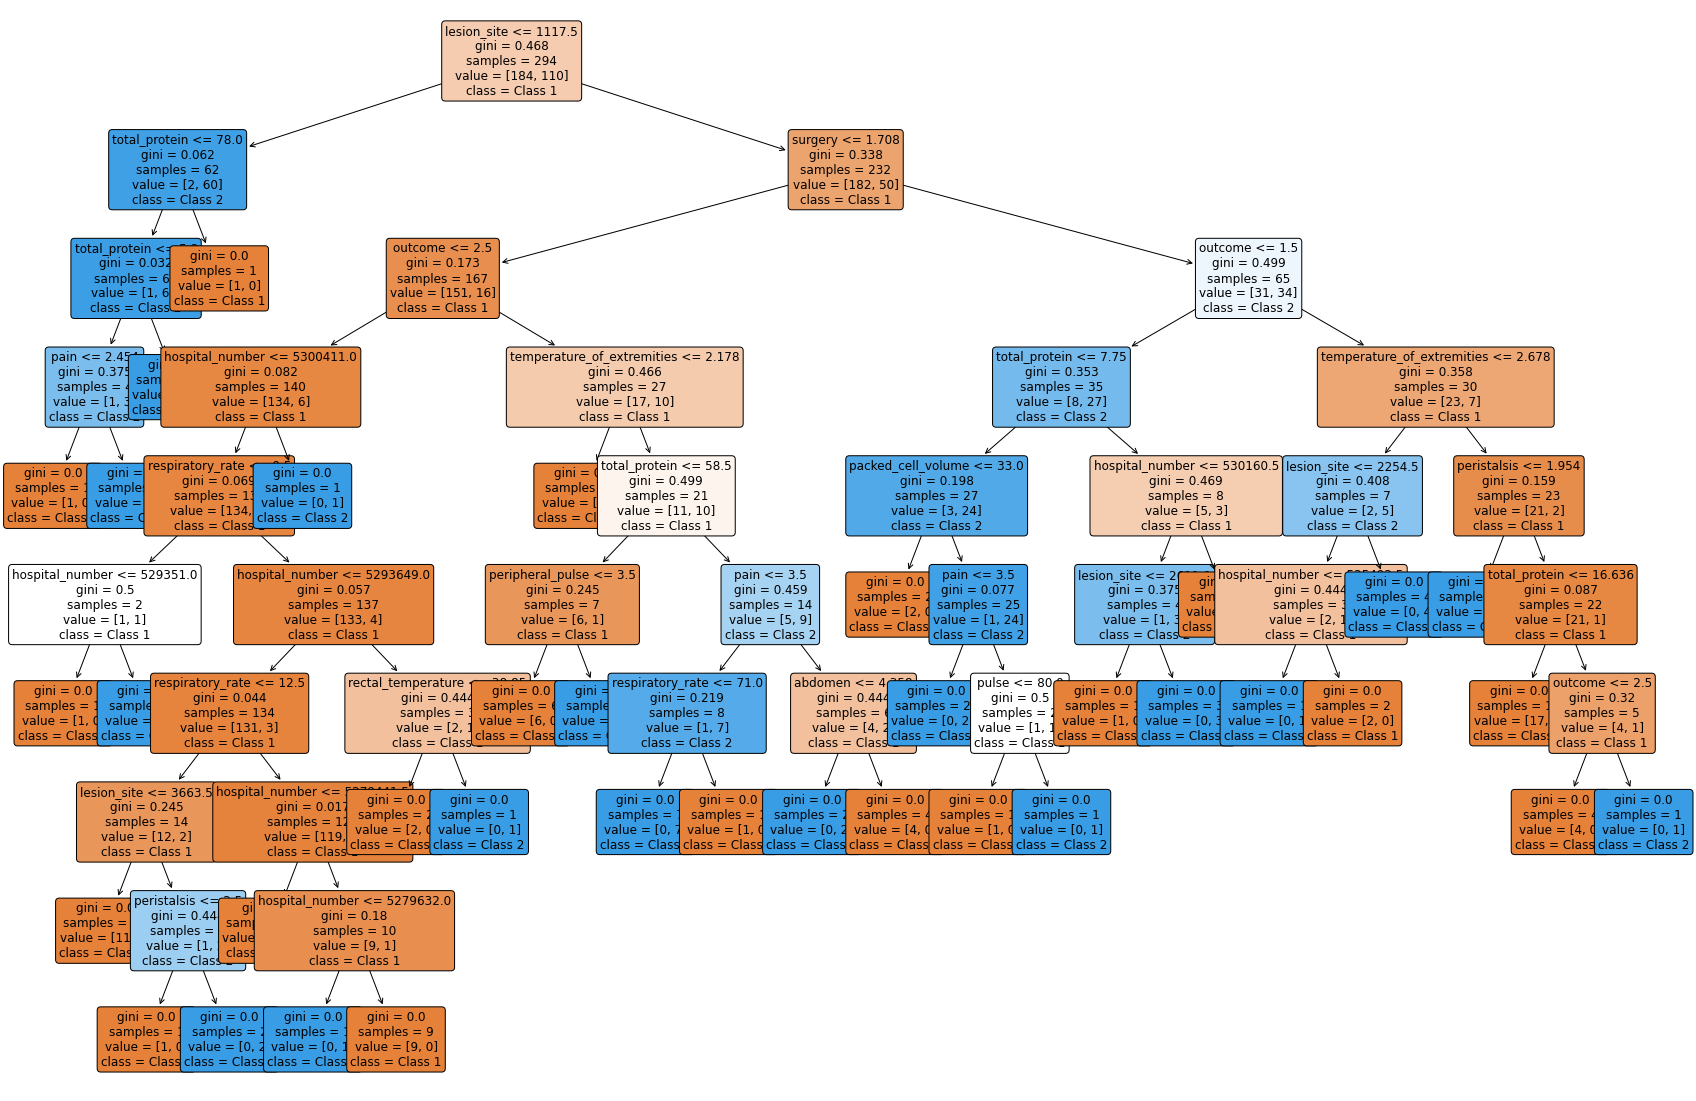

In [11]:
plt.figure(figsize=(30, 20)) 
plot_tree(clf, feature_names=X.columns, class_names=['Class 1', 'Class 2'], filled=True, rounded=True, fontsize=12)
plt.show()

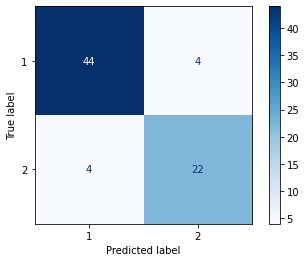

Confusion Matrix:
[[44  4]
 [ 4 22]]
True Positives: 44
False Positives: 4
False Negatives: 4
True Negatives: 22


In [13]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

print("Confusion Matrix:")
print(cm)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        48
           2       0.85      0.85      0.85        26

    accuracy                           0.89        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.89      0.89      0.89        74

